In [3]:
import numpy as np
import matplotlib.pyplot as plt #importing the necessary libraries

In [167]:
class oneD_FDM_heat_conduction:
    def __init__(self,conduction_coeff,density,specific_heat,delta_x,delta_t,initial_value):
        self.conduction_coeff=conduction_coeff
        self.density=density
        self.specific_heat=specific_heat
        self.delta_x=delta_x
        self.delta_t=delta_t
        self.initial_value=initial_value
        
    def lambdavalue(self):
        k=self.conduction_coeff/(self.density*self.specific_heat)
        lambdavalue=k*self.delta_t/(self.delta_x**2)
        return lambdavalue
    def temperature_profile(self,total_time_step):
        T=np.empty(shape=[total_time_step,len(self.initial_value)])
        for i in range(len(self.initial_value)):
            T[0][i]=self.initial_value[i]
        for i in range(total_time_step):
            T[i][0]=self.initial_value[0]
            T[i][-1]=self.initial_value[-1]
        for i in range(1,total_time_step):
            for j in range (1,len(self.initial_value)-1):
                T[i][j]=T[i-1][j]+self.lambdavalue()*(T[i-1][j+1]-2*T[i-1][j]+T[i-1][j-1])
        return T
    def plot_profile(self,plot_time_interval,total_time_step):
        T_plot=self.temperature_profile(total_time_step*plot_time_interval)
        x=np.array([i for i in range(0,len(self.initial_value)*self.delta_x,self.delta_x)])
        for i in range(0,total_time_step*plot_time_interval,plot_time_interval):
            t=i*self.delta_t
            plt.plot(x,T_plot[i],label='t=%1.2f s'%t)
            plt.xlabel('x values')
            plt.ylabel('temperature')
            plt.legend()
        plt.show()
   
        
        
        
            
        
    
        

In [170]:
conduction_coeff= 0.49
density=2.7
specific_heat=0.2174
delta_x=2
delta_t=0.1
initial_value=[100,0,0,0,0,50]
oD=oneD_FDM_heat_conduction(conduction_coeff,density,specific_heat,delta_x,delta_t,initial_value)


In [171]:
oD.lambdavalue()

0.020869535588946813

In [172]:
oD.temperature_profile(6)



array([[1.00000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e+01],
       [1.00000000e+02, 2.08695356e+00, 0.00000000e+00, 0.00000000e+00,
        1.04347678e+00, 5.00000000e+01],
       [1.00000000e+02, 4.08679961e+00, 4.35537516e-02, 2.17768758e-02,
        2.04339981e+00, 5.00000000e+01],
       [1.00000000e+02, 6.00408290e+00, 1.27479942e-01, 6.44216808e-02,
        3.00204145e+00, 5.00000000e+01],
       [1.00000000e+02, 7.84309206e+00, 2.48805920e-01, 1.27044438e-01,
        3.92156026e+00, 5.00000000e+01],
       [1.00000000e+02, 9.60787471e+00, 4.04754039e-01, 2.08775326e-01,
        4.80400611e+00, 5.00000000e+01]])

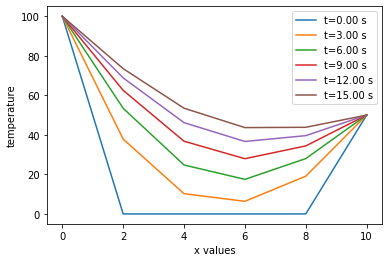

In [176]:
oD.plot_profile(30,6)